In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset/ISIS_Religious_Texts_v1.csv', delimiter=',', encoding='latin-1')
data.head(8)

# dataset: https://www.kaggle.com/fifthtribe/isis-religious-texts

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
0,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its h...",Support,First Page
1,Dabiq,1.0,Jun-14,Hadith,Sahih Muslim,The Hour will not be established until the Ro...,Support,Introduction
2,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its ...",Support,Introduction
3,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Muslims everywhere, glad tidings to you and...",Support,Khilafah Declared
4,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Ummah of Islam, indeed the world today has ...",Support,The World has Divided into Two Camps
5,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"Therefore, rush O Muslims to your state. Yes,...",Support,A Call to Hijrah
6,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"We make a special call to the scholars, fuqah...",Support,"A Call to all Muslim Doctors, Engineers, Schol..."
7,Dabiq,1.0,Jun-14,Hadith,Al-Hakim,Abdullah Ibn Amr narrated that the Prophet (s...,Support,The Concept of Imamah (Leadership) is From the...


In [182]:
pd.unique(data.Magazine)

array([u'Dabiq', u'Rumiyah', nan], dtype=object)

In [9]:
data['Magazine'].value_counts()

Dabiq      1481
Rumiyah    1203
Name: Magazine, dtype: int64

In [184]:
data.Magazine.isna().sum()

1

In [185]:
data[data.Magazine.isna()]

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
2684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
data.isna().sum()

Magazine           1
Issue              1
Date               1
Type               1
Source             5
Quote              1
Purpose         1851
Article Name      37
dtype: int64

In [187]:
data.shape

(2685, 8)

In [188]:
data = data.drop(['Purpose'], axis=1)
data.shape

(2685, 7)

In [189]:
data.isna().sum()

Magazine         1
Issue            1
Date             1
Type             1
Source           5
Quote            1
Article Name    37
dtype: int64

In [190]:
data = data.dropna()
data.sample(8)

,Magazine,Issue,Date,Type,Source,Quote,Article Name
1227,Dabiq,14.0,Apr-16,Qur'an,al-Ahzab 20,{They think the companies have not [yet] withd...,Lessons from the Fitnah of the Mongols
2109,Rumiyah,3.0,Nov-16,Classical Scholar,Ibn al-Athir,"Ibnul-Athir described it, saying, This idol w...",Jihad Through Du'a
1534,Rumiyah,1.0,Aug-16,Qur'an,al-An'am 115,And the word of your Lord has been fulfilled ...,Interview With the Amir of the Central Office ...
1066,Dabiq,13.0,Dec-15,Tafsir,al-Qurtubi,"In his tafs?r of the aforementioned ?yah, al-Q...",Do They Not Then Reflect on the Quran
2140,Rumiyah,5.0,Jan-17,Qur'an,al-Ankabut 41,The example of those who take allies other th...,The Syrian Sahwat Shallow Unity and Reliance o...
2557,Rumiyah,8.0,Apr-17,Qur'an,al-Anbiya 83,"Indeed, adversity has touched me, and you are...",Being Blessed with Health and Tested with Illness
2408,Dabiq,8.0,Mar-15,Unknown,Sharh Sah?h Muslim,"Ibn Rajab (rahimahull?h) said, What is meant ...",Irja -The Most Dangerous Bid'ah
1334,Dabiq,15.0,Jul-16,Qur'an,al-Anbiya 92,"Verily a single nation is your nation, and I ...",Words of Sincere Advice


In [191]:
pd.unique(data.Source)

array([u"Abu Mus'ab az-Zarqawi", u'Sahih Muslim', u'Abu Bakr al-Baghdadi',
       ..., u'az-Zukhruf 54', u"al-A'raf 176", u'al-Imran 111'],
      dtype=object)

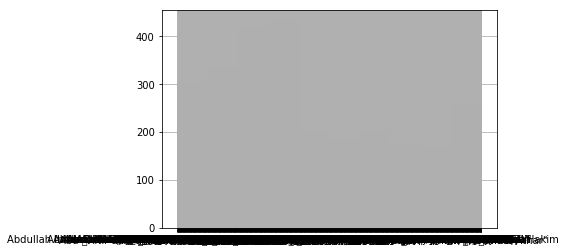

In [10]:
data['Source'].hist()

In [193]:
len(pd.unique(data.Source))

1142

In [194]:
len(pd.unique(data.Type))

23

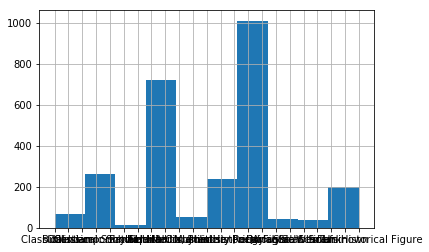

In [195]:
data.Type.hist()

In [12]:
data['Type'].value_counts()

Qur'an                           1011
Hadith                            732
Classical Scholar                 264
Jihadist                          138
Tafsir                            105
Unknown                            98
Media, Politician, or Analyst      77
Bible                              62
Salaf                              39
Sira                               33
Hadith Commentary                  30
Muslim Historical Figure           28
Islamist                           25
Religious Scholar                  11
Fatwa                               8
Shia Scholar                        6
Fiqh                                5
Contemporary Scholar                4
Classical Islamic Scholar           3
Christian                           2
Western Historical Figure           1
Poetry                              1
Hadith                              1
Name: Type, dtype: int64

In [197]:
used_col = ['Quote','Magazine']

data = data[used_col]
data.sample(8)

,Quote,Magazine
167,Allahs Messenger (sallall?hu alayhi wa salla...,Dabiq
1053,"Ibn Umar ? said, It is not right that she sh...",Dabiq
2228,"Ibn Kathir said, [Allah taught him] how to ma...",Rumiyah
661,"Ibn Awn said, I wrote to N?fi, so he wrote ...",Dabiq
983,{And [mention] when Luqm?n said to his son whi...,Dabiq
1734,"""Jannah is encircled by harship and the Fire i...",Rumiyah
2101,"Ibn Taymiyyah said, ""The Shari'ah does not rec...",Rumiyah
1072,"{Allah said, Then indeed, it is forbidden to ...",Dabiq


In [198]:
data['Magazine_id'] = data['Magazine'].factorize()[0]
data.sample(8)

,Quote,Magazine,Magazine_id
1339,"O you who believe, obey Allah and obey the Me...",Dabiq,0
2037,"Ibn Rajab said, The bulk of the scholars hold...",Rumiyah,1
717,"He said, O Ahlus-Sunnah in Iraq seek shelte...",Dabiq,0
659,{And a believing slave-girl is better than a m...,Dabiq,0
2445,"Indeed, Allah does not look to your images an...",Rumiyah,1
1912,Ibn al-Ath?r said describing the reason it is ...,Dabiq,0
1692,"Abul-Abbas Ibn Taymiyyah ? said, And know  ...",Rumiyah,1
1586,"And Ibn Masud ? said, Knowledge is not an ab...",Rumiyah,1


In [199]:
encoding_data, mapping_index = data['Magazine'].factorize()
print(encoding_data)
print(mapping_index)

for i in range(len(mapping_index)):
    print(i,mapping_index[i])

[0 0 0 ... 1 1 1]
Index([u'Dabiq', u'Rumiyah'], dtype='object')
(0, u'Dabiq')
(1, u'Rumiyah')


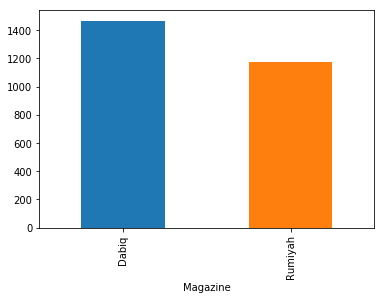

In [200]:
data.groupby(['Magazine'])['Quote'].count().plot.bar()

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    norm='l2',
    encoding='latin-1',
    min_df=5,
    sublinear_tf=True
)

features = tfidf.fit_transform(data['Quote']).toarray()
labels = data['Magazine_id']

features.shape

(2645L, 3950L)

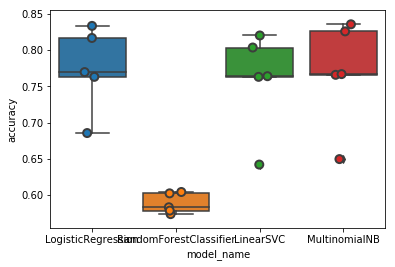

In [202]:
# find the best model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
    LinearSVC(),
    MultinomialNB()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [203]:
cv_df.groupby(['model_name'])['accuracy'].mean().sort_values(ascending=False)

model_name
LogisticRegression        0.773861
MultinomialNB             0.768928
LinearSVC                 0.758729
RandomForestClassifier    0.588299
Name: accuracy, dtype: float64

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(
    data['Quote'], 
    data['Magazine_id'], 
    test_size=0.3, 
    random_state=0
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transfomer = TfidfTransformer()
X_train_tfidf = tfidf_transfomer.fit_transform(X_train_counts)

clf = LogisticRegression().fit(X_train_tfidf, y_train)

In [205]:
data.sample(3)

,Quote,Magazine,Magazine_id
1096,"As such, it is har?m for the mourning widow to...",Dabiq,0
928,"{Say, Do you await for us except one of the t...",Dabiq,0
1874,"A man asked al-Bara ?, O Abu Umarah! Did you...",Rumiyah,1


In [208]:
predict = clf.predict(count_vect.transform([data['Quote'][928]]))

print(mapping_index[predict])[0]

Dabiq


In [209]:
predict = clf.predict(count_vect.transform([data['Quote'][1874]]))

print(mapping_index[predict])[0]

Rumiyah


In [215]:
quote = data.sample(1)
quote

,Quote,Magazine,Magazine_id
1978,"Ibn Umar ? narrated, One of Umars women wo...",Rumiyah,1


In [216]:
predict = clf.predict(count_vect.transform([data['Quote'][1978]]))

print(mapping_index[predict])[0]

Rumiyah


In [242]:
magazine_id_df = data[['Magazine', 'Magazine_id']].drop_duplicates().sort_values('Magazine_id')
magazine_to_id = dict(magazine_id_df.values)
id_to_magazine = dict(magazine_id_df[['Magazine_id', 'Magazine']].values)
data.head()

,Quote,Magazine,Magazine_id
0,"The spark has been lit here in Iraq, and its h...",Dabiq,0
1,The Hour will not be established until the Ro...,Dabiq,0
2,"The spark has been lit here in Iraq, and its ...",Dabiq,0
3,"O Muslims everywhere, glad tidings to you and...",Dabiq,0
4,"O Ummah of Islam, indeed the world today has ...",Dabiq,0


============================================================

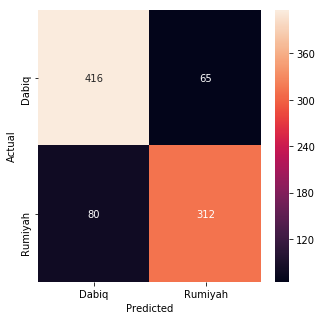

accuracy: 0.8339060710194731


In [256]:
model = LogisticRegression()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    features, labels, data.index, test_size=0.33, random_state=0
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=magazine_id_df['Magazine'].values, 
            yticklabels=magazine_id_df['Magazine'].values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import accuracy_score

print('accuracy: %s' % (accuracy_score(y_test, y_pred)))

inspired by: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f